In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df_train_org = pd.read_csv('house_price_train.csv')
house_df_test_org = pd.read_csv('house_price_test.csv')
house_df_org = pd.concat([house_df_train_org,house_df_test_org])
house_df = house_df_org.copy()
house_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [2]:
house_df_ohe = pd.get_dummies(house_df)
print(house_df_ohe.shape)

(2919, 290)


In [4]:

def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

## EDA

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

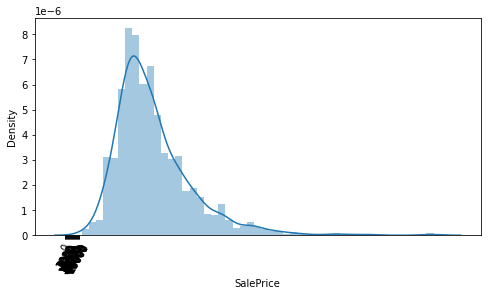

In [11]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(house_df_train_org['SalePrice'])

## Model training

In [5]:
house_train = house_df[:len(house_df_train_org)]
house_test = house_df[len(house_df_train_org):]

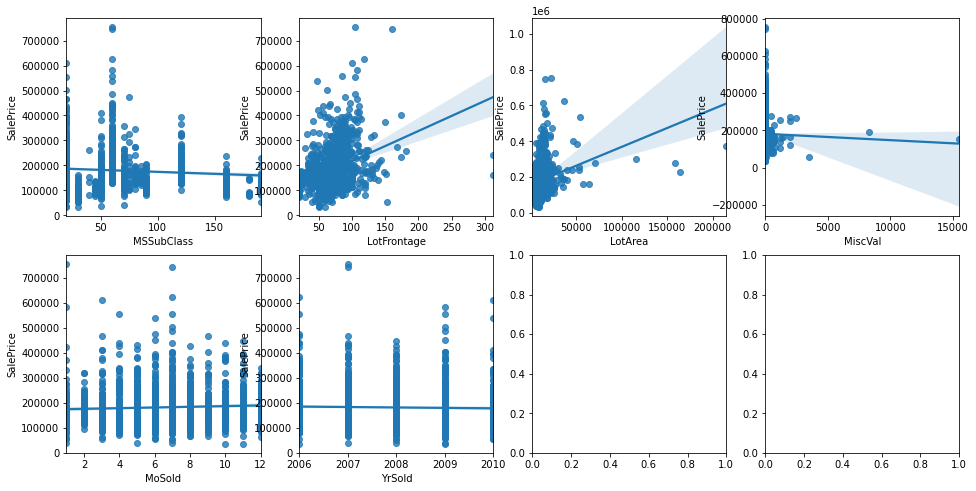

In [13]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['MSSubClass','LotFrontage','LotArea','MiscVal','MoSold','YrSold']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='SalePrice',data=house_df_train_org , ax=axs[row][col])

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = house_df_train_org['SalePrice']
X_data = house_df_train_org.drop(['SalePrice'],axis=1,inplace=False)

X_train , X_val , y_train , y_val = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_val)
mse = mean_squared_error(y_val, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

## 여기에서부터 could not convert string to float: 'RL' 오류가 나는데 데이터에 string 이 포함되어서 발생하는 건가요??
## 어떤 feature에서 발생하는 오류인지를 모르겠습니다..!

ValueError: could not convert string to float: 'RL'

In [22]:
lr = LinearRegression()
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [23]:
lr = LinearRegression()
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [25]:

from sklearn.model_selection import cross_val_score

y_target = house_df['SalePrice']
X_data = house_df.drop(['SalePrice'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [nan nan nan nan nan]
 5 folds 의 개별 RMSE scores :  [nan nan nan nan nan]
 5 folds 의 평균 RMSE : nan 
